<a href="https://colab.research.google.com/github/Scrabby1/ADA-Informes/blob/main/Informe_SubArreglo_maximo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#1.Descripción del problema

**Entrada:** Secuencia de **n** numeros


**Salida:**Un sub-arreglo el cual sus elementos da la mayor suma de los elementos contenidos en el sub-arreglo y mayor que cualquier otra suma de otros sub-arreglos

Cuando hacemos un algoritmo para encontrar una solución, siempre se quiere encontrar la solución más eficiente de todas, este tipo de problema se llaman problemas de optimización, en este informe se vera la solucion para encontrar el máximo sub-arreglo del arreglo, esto lo hará el algoritmo sub-arreglo máximo

El tamaño del problema es el tamaño de la entrada, en este caso la entrada es un arreglo, por lo que el tamaño del problema es el tamaño del arreglo, ósea n

Una de las aplicaciones de este algoritmo es el analisis de las secuencias genómicas, se usa para identificar fragmentos importantes de la secuencia de proteina como las regiones GC-rich y las regiones de carga alta

Otra aplicación que tiene es en la visión de computadoras, tienen el uso de encontrar las áreas mas brillantes en las imágenes de mapabits.

#2.Sub-arreglo máximo

A continuación, se mostrará la implementación del algoritmo sub-arreglo máximo

In [2]:
cont=0
def maxSubArrayMid(arr,low,mid,high): #Funcion que encuentra el sub-arreglo que pasa por la mitad
  sm=0
  sumaIz=-10000
  global cont
  for i in range(mid,low-1,-1):#se suman los elementos elementos de la izquierda hasta encontrar el valor maximo
    sm=sm+arr[i]
    if(sm>sumaIz):
      sumaIz=sm
      lowAux=i
      cont+=1
  sm=0
  sumaDe=-10000
  for i in range(mid+1,high+1):#se realiza la misma accion anterior pero ahora con la derecha
    sm=sm+arr[i]
    if(sm>sumaDe):
      sumaDe=sm
      highAux=i
      cont+=1
  return max(sumaIz+sumaDe,sumaIz,sumaDe),lowAux,highAux #se comprueba entre la suma de ambos y las sumas individuales para ver cual de ellos es el mayor,tambien se retornan los indices del sub-arreglo mayor

def maxSubArray(arr,low,high,verbose=False):#funcion principal que encuentra el maximo sub-arreglo
  if(low==high):
    return arr[low],low,high
  mid=(low+high)//2
  sumaIz,lowI,highI=maxSubArray(arr,low,mid,verbose) #de manera recursiva se van teniendo las sumas de la izquierda,derecha y el que pasa por el medio
  sumaDe,lowD,highD=maxSubArray(arr,mid+1,high,verbose)
  sumaMid,lowM,highM=maxSubArrayMid(arr,low,mid,high)
  if(verbose==True and len(arr[low:mid]) > 0 and len(arr[mid:high]) > 0):
    print("Sub-arreglo izquierda",arr[lowI:highI+1])
    print("Sub-arreglo derecha",arr[lowD:highD+1])
    print("Sub-arreglo que pasa por el medio",arr[lowM:highM+1])
    print("--------------------------------------------------------------")

  if(max(sumaIz,sumaDe,sumaMid)==sumaDe):#se retorna el maximo de los sub-arreglos
    return sumaDe,lowD,highD

  if(max(sumaIz,sumaDe,sumaMid)==sumaIz):
    return sumaIz,lowI,highI

  return sumaMid,lowM,highM

#Ejemplo
a=[13,-3,-25,20,-3,-16,-23,18,20,-7,12,-5,-22,15,-4,7]
print("Arreglo original:",a)
print("**************************************************************")
n=len(a)
mmax,i,j=maxSubArray(a,0,n-1,verbose=False)
print("suma maxima:",mmax)
print("indices del sub-arreglo:",i,j)
print("esta le corresponde a :",a[i:j+1])
print("**************************************************************")

Arreglo original: [13, -3, -25, 20, -3, -16, -23, 18, 20, -7, 12, -5, -22, 15, -4, 7]
**************************************************************
suma maxima: 43
indices del sub-arreglo: 7 10
esta le corresponde a : [18, 20, -7, 12]
**************************************************************


**Descripción del algoritmo**

Este algoritmo recibe como entrada un arreglo **a**, un indice **low** y un indice **high**, estos representan posiciones en los sub-arreglos de izquierda y derecha respectivamente.Pero inicialmente toman el valor de la primera y penúltima posición del arreglo

Este algoritmo esta compuesto de dos funciones: maxSubArray, que se encarga de dividir el arreglo y maxSubArrayMid, esta se encarga de encontrar el máximo sub-arreglo que pasa por el índice del medio.

La función maxSubArray primero recibe el arreglo y los respectivos índices, esta retorna el mismo arreglo si ambos índices son iguales, ósea que el arreglo sea de tamaño uno. Cuando ese no es el caso se obtiene el índice del medio **mid**, luego se llama a la función max que nos entregara el máximo de cada sub-arreglo, estos tres pueden ser los siguientes: el sub-arreglo que se encuentra a la izquierda de la posición del medio **a[lowI,highI+1]**, el sub-arreglo que se encuentra a la derecha de la posición del medio **a[lowD,highD+1]** o el sub-arreglo que pasa por el medio **a[lowM,highM+1]**.

La función maxSubArrayMid se encarga de encontrar el arreglo que pasa por la posición que pasa por el medio.Para hacer esto la función necesita como parametros la posición del medio **mid**, el arreglo **arr**, la primera posición del arreglo mas cercana a la mitad **mid** por la izquierda **low** y por la derecha **high**

Una vez obtenido estos datos se realiza la búsqueda del sub-arreglo máximo que pasa por el medio,para hacerlo nos movemos desde la posición mas cercana a la posición del medio desde la izquierda y la derecha y vamos sumando alejandonos de la posición del medio encontrando la sumas de los dos lados,luego se comprueba quien de los siguientes da la suma máxima:el de la derecha,el de la izquierda o la suma de ambos(que seria la combinación de los dos). 

Al final como salida vamos a tener el sub-arreglo que maximice la suma de sus elementos y la suma sea mayor que la de los otros dos sub-arreglos.

**Ejemplo**

Tomemos el siguiente arreglo

**a=[1, -2, 3, 4, -9, 6]**

Primero se va reduciendo el sub-arreglo hasta que quede solo un elemento en el sub-arreglo de la izquierda y de la derecha,esto se hace segun la posición **mid** 

Haciendo estos pasos quedaremos con los siguientes sub-arreglos
**Izquierda:[1]**,
**Derecha:[3]**,
**Sub-arreglo del medio:[1,-2,3]**

La suma máxima la tiene el de la derecha siendo 3

Una vez comprobada la izquierda del arreglo desde el centro de este,comprobamos el lado derecho

Como sub-arreglos vamos a tener a: **Izquierda:[4]**, **Derecha:[6]** y **Sub-arreglo del medio[4,-9,6]**

La suma máxima la posee el derecho con 6

ahora comprobaremos por el centro del arreglo

Tendremos los siguientes sub-arreglos: **Izquierda[3]** , **Derecha[6]** y el **Sub-arreglo del medio es [3,4]**

No incluimos el -9 debido a que es un valor demasiado pequeño y disminuye el tamaño en vez de mejorarlo

La suma máxima la posee el sub-arreglo del medio con 7

Esta es la mayor suma de todas, por lo tanto es la mayor suma del arreglo

**Ejecución con la función verbose=True**

In [3]:
import random
a=random.sample(range(-100,100),6)
n=len(a)
print("Arreglo original:",a)
print("**************************************************************")
mmax,i,j=maxSubArray(a,0,n-1,True)
print("suma maxima:",mmax)
print("esta le corresponde a :",a[i:j+1])
print("**************************************************************")

Arreglo original: [-63, -87, 97, -21, -99, 28]
**************************************************************
Sub-arreglo izquierda [-63]
Sub-arreglo derecha [97]
Sub-arreglo que pasa por el medio [-87, 97]
--------------------------------------------------------------
Sub-arreglo izquierda [-21]
Sub-arreglo derecha [28]
Sub-arreglo que pasa por el medio [-99, 28]
--------------------------------------------------------------
Sub-arreglo izquierda [97]
Sub-arreglo derecha [28]
Sub-arreglo que pasa por el medio [97, -21]
--------------------------------------------------------------
suma maxima: 97
esta le corresponde a : [97]
**************************************************************


# 3.Correctitud

## Función maxSubArrayMid

**Teorema (correctitud)**

La función maxSubArrayMid encuentra correctamente el sub-arreglo máximo que pasa por la mitad del arreglo

**Prueba del teorema**

Para probar el teorema utilizaremos la propiedad del bucle invariante

La propiedad del bucle invariante dice:La función maxSubArray antes de iterar contiene la mayor suma del sub-arreglo de la parte izquierda y derecha del arreglo

**Inicialización:** Al comienzo,ambos sub-arreglos contendran el valor de la posición del medio del arreglo **a[mid]**,este elemento sera la mayor suma actual que pasa por el elemento del medio,cambiando asi las variables que almacenan la suma de cada lado

**Mantención:** en la i-ésima iteración,la variable que contiene la suma de la izquierda tendra la mayor suma de los elementos de la izquierda,partiendo desde la posición **i** hasta **mid**,acabando allí.Lo mismo se puede decir de la suma de la derecha,tendremos el mayor valor de la suma de sus elementos,partiendo desde mid+1 hasta high+1 

Una vez finalizada la iteración,las sumas de la izquierda y derecha tendran el mayor valor de la suma de ambos lados

**Correctitud**

Como la propiedad del bucle se cumple para la inicialización y la mantención,cuando la función termine entregara el sub-arreglo que contiene la mayor suma de sus elementos y pasa por el medio

##Función maxSubArray

**Teorema (correctitud)**

La función maxSubArray entrega de forma correcta el sub-arreglo que entrega la mayor suma de todos sus elementos.

**Prueba del teorema**

Para probar el teorema se utilizara inducción matemática.

Nuestra hipótesis **P(n)** debe probar que retorna el sub-arreglo máximo para el caso base y el inductivo

En el caso base **n=1**,nuestra función va a retornar el máximo debido a que es muy pequeño ósea que se cumple para el caso **P(1)**.

En el caso inductivo se debe probar que **P(m)** es cierto para **m < n** ya que si se cumple implica que también se cumplira para **P(n)**.

Para **n** elementos,la función divide el arreglo en dos sub-arreglos de tamaño **m**,siendo **m=n/2**,como **m** es menor que **n**,se asume que en el paso inductivo la función retorna correctamente el máximo sub-arreglo

Luego la función maxSubArrayMid nos entrega sub-arreglo máximo que pasa por el medio.Como ya se probo anteriormente que esta función es correcta,esto hace que maxSubArray sea correcta. 

# 4.Tiempo de ejecución

Para calcular el tiempo de ejecución usaremos la ecuación recurrente de la función

Primero para el caso cuando el tamaño del arreglo es pequeño retorna el mismo arreglo,por lo que eso es **O(1)**

Mientras que en cualquier otro caso se obtendra de la siguiente formula: **T(n)=aT(n/b)+C(n)+D(n)**

**a** sera la cantidad de llamadas recursivas que hace algoritmo siendo dos veces en este caso, **b** en cuanto divide el arreglo que serian 2 ya que lo divide desde la mitad, **C(n)** es la complejidad de combinarlo, en este caso es **O(n)** ya que tiene complejidad lineal la combinación y por último **D(n)** seria la complejidad de la separación del arreglo,en este caso tiene complejidad **O(1)**

Nuestra ecuación recurrente ahora se vera asi: **T(n)=2T(n/2)+O(n)**

Con esta ecuación usaremos el teorema maestro para tener la complejidad del algoritmo
Segun el teorema maestro nuestro problema estaria en el caso 1 por lo tanto la cota superior asintótica seria: **O(nlogn)**.

Cabe destacar que esta función no posee un mejor o peor caso, esto ocurre debido a que no importa como este compuesto el arreglo, realizara la misma cantidad de divisiones para encontrar el sub-arreglo máximo, si le entregamos un arreglo donde todos sus elementos son iguales, este va a realizar la misma cantidad de comparaciones para encontrar el sub-arreglo máximo (que seria el mismo arreglo).

# 5.Experimentos

A continuación se presentaran los distintos experimentos realizados

**Comparación entre maxSubArray y algoritmo de kadane**

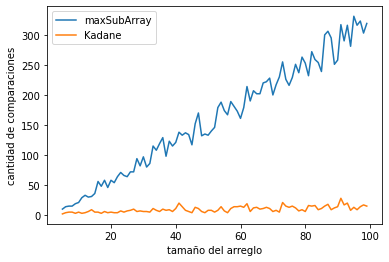

In [4]:
import matplotlib.pyplot as plt
import random
def Kadane(array):
  sumaMax=0
  currentMax=0
  cont2=0
  for i in array:
    currentMax+=i
    if(currentMax<0):
      currentMax=0
    if(sumaMax<currentMax):
      sumaMax=currentMax
      cont2+=1
  return sumaMax,cont2


x=[n for n in range(5,100)]
y=[];
z=[];
for n in range(5,100):
  a=random.sample(range(-100,100),n)
  b=random.sample(range(-100,100),n)
  cont=0
  max1,i,j=maxSubArray(a,0,len(a)-1)
  max2,cont2=Kadane(b)
  y.append(cont)
  z.append(cont2)
plt.plot(x,y)
plt.plot(x,z)
plt.legend(["maxSubArray","Kadane"])

plt.xlabel('tamaño del arreglo')
plt.ylabel('cantidad de comparaciones')
plt.show()

**Análisis del resultado**

Como se puede apreciar en el gráfico, kadane realiza una menor cantidad de comparaciones en relación a maxSubArray, esta diferencia ocurre ya que el arreglo de kadane tiene complejidad O(n) y el maxSubArray tiene complejidad O(n*logn), maxSubArray realiza muchas mas divisiones y comparaciones independiente de como estén organizados los elementos, mientras que kadane realiza su función de manera mas lineal y directa.

**El peor caso de kadane en maxSubArray**

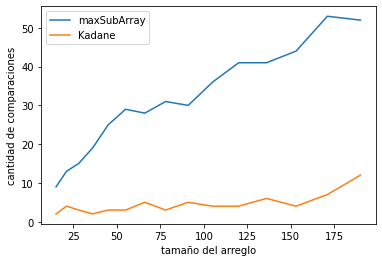

In [5]:
x=[(n+n**2)/2 for n in range(5,20)]#peor caso de kadane
y=[];
z=[];
for n in range(5,20):
  a = random.sample(range(-100,100),n)
  b=random.sample(range(-100,100),n)
  cont=0
  mmax,i,j=maxSubArray(a,0,len(a)-1)
  max2,cont2=Kadane(b)
  y.append(cont)
  z.append(cont2)
plt.plot(x,y)
plt.plot(x,z)
plt.legend(["maxSubArray","Kadane"])

plt.xlabel('tamaño del arreglo')
plt.ylabel('cantidad de comparaciones')
plt.show()

**Análisis del resultado**

Se puede apreciar que el algoritmo maxSubArray para el peor caso de Kadane tiene una cantidad de comparaciones mayor a medida que el arreglo se hace más grande,kadane incluso en su peor caso sigue haciendo una menor cantidad de comparaciones que maxSubArray por lo que demuestra que el algoritmo kadane es superior a maxSubArray.